# PRACTICA 2a - Web Scraping

## 0. INTRODUCCIÓN

En este vamos a trabajar la extracción automática de datos de la web, proceso Conocido como web scraping. Antes de ponernos manos a la obra, vamos a Refrescar algunos conceptos e introducir puntos claves de las librerías con las que vamos a trabajar. 
 
En la web, los servidores y los clientes generalmente se comunican a través de solicitudes HTTP. 
El protocolo HTTP (‘Hyper Text Transfer Protocol’) especifica cómo se formatean y transmiten las solicitudes y respuestas. 
Mediante este proceso solicitud-respuesta, es como se realiza la mayor parte de la navegación web. Al abrir una página, el navegador envía una solicitud al servidor de esa página, y el servidor responde con los recursos relevantes (texto, imágenes, tablas, etc. ).

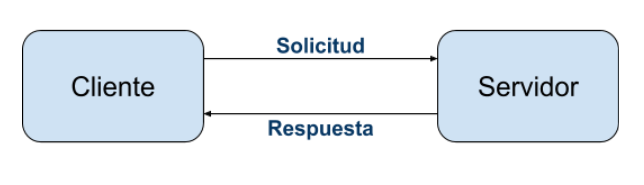






Principalmente, hay dos tipos de **solicitudes**:

1.   GET


 	
- Permiten obtener datos del servidor.
- Se puede marcar como favorito. 		
- Los parámetros se agregan directamente a la URL.
- No se utiliza para enviar información confidencial (como contraseñas)
 			

2.   POST
 	
- Normalmente	se usa cuando un estado necesita ser alterado (como agregarle elementos carrito de compras) o al enviar contraseñas.
- Los parámetros se agregan en un cuerpo separado, así es más seguro
- No se puede marcar como favorito.
 	
 


La **respuesta** contiene 2 piezas principales de información: el código de estado y el cuerpo de la respuesta.
 
- El __código de estado__ indica si la solicitud fue exitosa y / o la existencia de algún error. Está representado por un número de 3 dígitos.

  - Los códigos en estos rangos indican:

    - 2xx: Éxito.
    - 3xx: Redirección.
    - 4xx: Error del cliente.
    - 5xx: Error del servidor.
 
  - Los dos códigos más frecuentes son los siguientes:
    - 200 OK: La solicitud se cursó exitosamente.
    - 404 Not Found: El servidor no puede encontrar la página o fuente solicitada. 

- El __cuerpo de la respuesta__ contiene la información de la solicitud. Normalmente, se obtiene en formato HTML o JSON.



---

Un **documento HTML** está formado por un conjunto de elementos o etiquetas anidadas, además de código JavaScript y CSS.

Antes de hacer scraping, por tanto, debemos conocer qué elementos o qué etiqueta contiene la información que queremos obtener de la página web en cuestión. Para ello, tenemos que tener presente las siguientes consideraciones:

- Un elemento o etiqueta tiene la siguiente sintaxis:

> **\<nombre_etiqueta\>**contenido **\<\/nombre_etiqueta\>**

> Estos elementos pueden tener información adicional especificada en los atributos de la etiqueta.


- Los atributos más comunes son:

  - id

  - class

> Ejemplo: \<div class=“descriptive-class-name”\>….\<\/div\>





- Las etiquetas más populares son:

  - link: \<a href=“url_of_link”\>Texto del link\<\/a\>
  - párrafo: \<p\>…\<\/p\>
  - .... \<h1\>…\<\/h1\>
  - etiqueta de un contenedor o conjunto de etiquetas: \<div class=“hahaha”\>…\<\/div\>
  - Etiqueta para marcar parte del contenido: \<span id=“id de este span”\>…\<\/span\>








_Ejemplo esquema básico de un documento HTML_




```
<html>
	<head>
		<meta charset=”utf-8”/>
		<title> Ejemplo </title>
	</head>
	<body>
		<h1> Encabezado 1</h1>
		<p> Primer párrafo del ejemplo del html de ejemplo. </p>
		<h2> Encabezado 2.  </h2>
			<ul>
				<li>Element 1 de la lista</li>
				<li>Element 2 de la lista</li>
			</ul>
    <div>
      <p>Segundo párrafo. </p> 
      <table>
        <th>Tabla de ejemplo </th>
        <tr>
          <td>celda 1,1 </td>
          <td>celda 1,2 </td>
          <td>celda 1,3 </td>
        </tr>
        <tr>
          <td>celda 2,1 </td>
          <td>celda 2,2 </td>
          <td>celda 2,3 </td>
        </tr>
      </table>
    </div>
	</body>
</html>

```




---

Las **principales metodologías** que nos permiten hacer web scraping son:

- Utilizando APIs (Application programming interface)
- Mediante Scrapers (librerías que nos permiten extraer datos web automáticamente. Por ejemplo, BeautifulSoap, Requests-html,...)
- Web crawling (un programa ‘spider’ busca por el contenido solicitado siguiendo links y explorandolos).
 



**Las dos primeras metodologías las vamos a trabajar en las diferentes partes de esta PRACTICA mediante los ejercicios planteados. La tercera de ellas, junto con el web scraping en streaming, la trabajaremos en la PAC3.**

## 1. WEB SCRAPING CON APIs

Una **API** es una interfaz de programación de aplicaciones. Esta especifica cómo deben interactuar cliente y un servidor. Si el cliente realiza una solicitud en un formato específico, el servidor siempre responderá en un formato documentado o iniciará una acción.

Algunas API son gratuitas, la mayoría son de pago o requieren registro. En el último caso, normalmente se proporciona una clave (_KEY_) y una identificación (_IDENTIFICATION\_KEY_) que debe incorporarse en cada solicitud a esa API. Por último, algunas API de pago ofrecen también una versión gratuita disponible con fines educativos o académicos, prohíbiendo la comercialización de productos que hagan su uso sin previo pago de licencia.

Para realizar las consultas se requiere la previa **revisión de la documentación que proporciona la API** para conocer la sintaxis que requieren las consultas o solicitudes y cuáles son los códigos de estados relevantes de la misma.

En esta parte de la PRACTICA vamos a trabajar con una API libre que no requiere registro, otra gratuita que si que lo requiere, y por último una API que es gratuita para uso académico y con previo registro.



> El alumno deberá completar **2 ejercicios prácticos** después de revisar la explicación previa.




### 1.1. APIs SIN REGISTRO 



Para trabajar esta parte, vamos a realizar el scraping de datos relativos al mercado eléctrico español mediante una API que proporciona datos de generación, demanda, transporte, etc. de electricidad publicado por REE (Red Eléctrica de España).

La documentacion de la API está disponible en: https://www.ree.es/en/apidatos

En primer lugar, debemos cargar las librerías que vamos a utilizar y definir la URL común a todas las solicitudes (_requests_) que vamos a realizar (url_base) y especificar los paramétros de la petición que deseemos hacer:

In [1]:
# Cargar packages
import requests # La librería requests proporciona las capacidades de mandar una petición/solicitud HTTP al servidor
import json

In [2]:
# Definir la URL común a todas las requests de la web que vamos a scrapear
url_base = 'https://apidatos.ree.es/es/datos/'
url_compl = 'generacion/estructura-generacion?start_date=2022-08-01T00:00&end_date=2022-08-31T00:00&time_trunc=month'

In [3]:
# Realizar una solicitud (request) al endpoint de la API con el método requests.get
respuesta = requests.get(url_base+url_compl)

Revisaremos el estado de la solicitud mediante el atributo _.status\_code_ de la respuesta.

In [4]:
# Comprobar el estado de la solicitud
respuesta.status_code

200

Como vemos, la solicitud se ha cursado correctamente. También se podría verificar con el atributo _.ok_

In [5]:
# Checking if the request went through ok
respuesta.ok

True

En este caso, la respuesta se puede obtener en formato json. Por tanto, para visualizar la respuesta en tal formato, aplicamos el método _.json()_. Además, con el uso de la librería json se puede hacer más leíble la respuesta.

In [6]:
print ('\n\nLas claves del diccionario son:\n'+str( respuesta.json().keys()) )

print(json.dumps(respuesta.json(),indent=4))



Las claves del diccionario son:
dict_keys(['data', 'included'])
{
    "data": {
        "type": "Generaci\u00f3n por tecnolog\u00eda",
        "id": "gen1",
        "attributes": {
            "title": "Generaci\u00f3n por tecnolog\u00eda",
            "last-update": "2022-11-11T00:26:42.000+01:00",
            "description": null
        },
        "meta": {
            "cache-control": {
                "cache": "HIT",
                "expireAt": "2023-01-06T09:47:52"
            }
        }
    },
    "included": [
        {
            "type": "Hidr\u00e1ulica",
            "id": "10288",
            "groupId": "1",
            "attributes": {
                "title": "Hidr\u00e1ulica",
                "description": null,
                "color": "#0090d1",
                "type": "Renovable",
                "magnitude": null,
                "composite": false,
                "last-update": "2022-09-09T10:39:45.000+02:00",
                "values": [
                    {
   

A partir de la URL base, modificando los parámetros de la url, se pueden obtener detalles como el balance eléctrico, la demanda (en términos de sectores económicos, la evolución, etc.), la generacón (con su estructura, la cantidad renovable, la potencia instalada, el balance en términos de CO2, etc.), los intercambios con los países colindantes, el transporte (líneas, cortes, interrupciones, etc.) y datos referentes al mercado como pueden ser los precios, costes, etc. Todos estos datos se pueden obtener por CCAA o en global así como especificando el rango temporal y con distinta frecuencia.

La sintaxis de los diferentes parametros de la url quedan explicados en la documentación de la API, de forma que podamos modificarlos de acuerdo con lo que se desee obtener.

_Por ejemplo, para conocer la demanda eléctrica mensual (time_trunc = month) a lo largo del 2019 para Navarra y las Baleares, la solicitud quedaría como sigue:_

In [7]:
# Definir url base y los parametros de la url correspondientes a la información que se desee obtener.
url_base = 'https://apidatos.ree.es/es/datos/'
url_compl1 = 'demanda/evolucion?start_date=2019-01-01T00:00&end_date=2019-12-31T23:59&time_trunc=month&geo_trunc=electric_system&geo_limit=ccaa&geo_ids=8743'
url_compl2 = 'demanda/evolucion?start_date=2019-01-01T00:00&end_date=2019-12-31T23:59&time_trunc=month&geo_trunc=electric_system&geo_limit=ccaa&geo_ids=14'

# Obtener la respuesta a la solicitud HTML
respuesta1 = requests.get(url_base+url_compl1)
respuesta2 = requests.get(url_base+url_compl2)

In [8]:
#Comprobar el estado de la solicitud
print('Estado de la respuesta Baleares:', respuesta1.status_code)
print('Estado de la respuesta Navarra:', respuesta2.status_code)

#Imprimir resultados: Se puede ver la estacionalidad en Baleares (turismo)
print(json.dumps(respuesta1.json(), indent=4))
print(json.dumps(respuesta2.json(), indent=4))

Estado de la respuesta Baleares: 200
Estado de la respuesta Navarra: 200
{
    "data": {
        "type": "Evoluci\u00f3n de la demanda",
        "id": "dem1",
        "attributes": {
            "title": "Evoluci\u00f3n de la demanda",
            "last-update": "2020-11-11T09:49:12.000+01:00",
            "description": null
        },
        "meta": {
            "cache-control": {
                "cache": "HIT",
                "expireAt": "2023-01-06T09:48:07"
            }
        }
    },
    "included": [
        {
            "type": "Demanda",
            "id": "10297",
            "groupId": null,
            "attributes": {
                "title": "Demanda",
                "description": null,
                "color": "#ffea00",
                "type": null,
                "magnitude": null,
                "composite": false,
                "last-update": "2020-11-11T09:49:12.000+01:00",
                "values": [
                    {
                        "value":

#### **Ejercicio Práctico 1** (Balance renovables Aragón-Cataluña)

Se solicita al alumno implementar un código python válido que permita dar respuesta a las siguientes preguntas: 

1. Para el año 2021, devolver el porcentaje anual de generación renovable y no renovable (_evolucion-renovable-no-renovable_) para Aragón y Cataluña.

2. Obtener la evolución anual del balance de renovables y no renovables para Aragón y Cataluña de 2017 a 2021 (ambos incluidos). Mostrar el resultado tanto en fomrato DataFrame como en una gráfica que ilustre la evolución temporal. Para la visualización se recomienda el uso de la librería _matplotlib_. 

3. Obtener la evolución mensual del balance de renovables y no renovables para Aragón y Cataluña de 2017 a 2021 (ambos incluidos). ¿Qué limitación de la API nos aparece si lo intentamos con un solo _GET_? 

4. Con más de un _GET_, obtener la evolución mensual del balance de renovables para Aragón y Cataluña de 2017 a 2021 (ambos incluidos). Mostrar el resultado tanto en formato DataFrame como en una gráfica que ilustre la evolución temporal. Devolver la fecha junto con el % de renovables en la que durante este periodo temporal la ratio tuvo mayor valor y menor valor en Aragón.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
def ask_inputs():
    category = input("Introduzca la category: ") 
    widget = input("Introduzca el wiget: ")
    fecha_inicio = input("introduzca la fecha de inicio (formato YYYY-MM-DDT00:00): ") 
    fecha_fin = input("introduzca la fecha final (formato YYYY-MM-DDT23:59): ")
    freq = input("introduzca la frecuencia: ")
    geo_limit = input("introduzca el límite geográfico: ")
    geo_ids = input("introduce la id geográfica: ")
    return f'{category}/{widget}?start_date={fecha_inicio}&end_date={fecha_fin}&time_trunc={freq}&geo_limit={geo_limit}&geo_ids={geo_ids}'


In [11]:
# Para pruebas, más cómodo así

def bypass_inputs(category='generacion', 
                    widget='evolucion-renovable-no-renovable', 
                    fecha_inicio='2021-01-01T00:00', 
                    fecha_fin='2021-12-31T00:00', 
                    freq='year', 
                    geo_limit='ccaa', 
                    geo_ids='9'
                    ):
    return f'{category}/{widget}?start_date={fecha_inicio}&end_date={fecha_fin}&time_trunc={freq}&geo_limit={geo_limit}&geo_ids={geo_ids}'
 

1. Para el año 2021, devolver el porcentaje anual de generación renovable y no renovable (_evolucion-renovable-no-renovable_) para Aragón y Cataluña.


In [12]:

url_base = 'https://apidatos.ree.es/es/datos/'

respuesta_cat = requests.get(url_base + bypass_inputs()) # ask_inputs() para pedirlos al usuario
respuesta_aragon = requests.get(url_base + bypass_inputs(geo_ids='5'))

dict_cat = json.loads(json.dumps(respuesta_cat.json()))
dict_aragon = json.loads(json.dumps(respuesta_aragon.json()))

renov_dict = {'ccaa': ['Cataluña', 'Aragón'],
                'Generación renovable': [],
                'Generación no renovable': []
                }

for dict in [dict_cat, dict_aragon]:
    renov_dict['Generación renovable'].append(dict['included'][0]['attributes']['values'][0]['percentage'])
    renov_dict['Generación no renovable'].append(dict['included'][1]['attributes']['values'][0]['percentage'])

df_gen_arag_cat_2021 = pd.DataFrame(renov_dict)

df_gen_arag_cat_2021


,ccaa,Generación renovable,Generación no renovable
0,Cataluña,0.169963,0.830037
1,Aragón,0.777081,0.222919


2. Obtener la evolución anual del balance de renovables y no renovables para Aragón y Cataluña de 2017 a 2021 (ambos incluidos). Mostrar el resultado tanto en fomrato DataFrame como en una gráfica que ilustre la evolución temporal. Para la visualización se recomienda el uso de la librería _matplotlib_. 

In [13]:
respuesta_cat = requests.get(url_base + bypass_inputs(category='balance', widget='balance-electrico', fecha_inicio='2017-01-01T00:00', fecha_fin='2021-12-31T00:00'))
respuesta_aragon = requests.get(url_base + bypass_inputs(category='balance', widget='balance-electrico', fecha_inicio='2017-01-01T00:00', fecha_fin='2021-12-31T00:00', geo_ids='5'))

dict_cat = json.loads(json.dumps(respuesta_cat.json()))
dict_aragon = json.loads(json.dumps(respuesta_aragon.json()))


In [14]:
renov_dict = {'Años': ['2017', '2018', '2019', '2020', '2021'],
                'Balance renovables Aragón': [],
                'Balance no renovables Aragón': [],
                'Balance renovables Cataluña': [],
                'Balance no renovables Cataluña': []
                }

for minidict in dict_cat['included'][0]['attributes']['content'][-1]['attributes']['values']:
    renov_dict['Balance renovables Cataluña'].append(minidict['value'])
for minidict in dict_cat['included'][1]['attributes']['content'][-1]['attributes']['values']:
    renov_dict['Balance no renovables Cataluña'].append(minidict['value'])
for minidict in dict_aragon['included'][0]['attributes']['content'][-1]['attributes']['values']:
    renov_dict['Balance renovables Aragón'].append(minidict['value'])
for minidict in dict_aragon['included'][1]['attributes']['content'][-1]['attributes']['values']:
    renov_dict['Balance no renovables Aragón'].append(minidict['value'])

df_renov = pd.DataFrame(renov_dict)

df_renov


,Años,Balance renovables Aragón,Balance no renovables Aragón,Balance renovables Cataluña,Balance no renovables Cataluña
0,2017,7.462987e+06,9271154.270,7.359630e+06,3.744653e+07
1,2018,8.564999e+06,6632646.307,8.840418e+06,3.363354e+07
2,2019,8.293142e+06,7058639.429,7.261328e+06,3.794563e+07
3,2020,1.233336e+07,5718905.786,8.398714e+06,3.455957e+07
4,2021,1.513617e+07,4342064.389,6.777598e+06,3.309938e+07


In [15]:
dict_cat['included']

[{'type': 'Renovable',
  'id': 'Renovable',
  'attributes': {'title': 'Renovable',
   'last-update': '2022-11-11T00:47:37.000+01:00',
   'description': None,
   'magnitude': None,
   'content': [{'type': 'Hidráulica',
     'id': '10330',
     'groupId': 'Renovable',
     'attributes': {'title': 'Hidráulica',
      'description': '10288',
      'color': '#0090d1',
      'type': 'distinct',
      'magnitude': None,
      'composite': False,
      'last-update': '2022-11-11T00:47:37.000+01:00',
      'values': [{'value': 3698470.829,
        'percentage': 0.5025348967432911,
        'datetime': '2017-01-01T00:00:00.000+01:00'},
       {'value': 5379262.702,
        'percentage': 0.6084851059233807,
        'datetime': '2018-01-01T00:00:00.000+01:00'},
       {'value': 3476544.134,
        'percentage': 0.4787752451155927,
        'datetime': '2019-01-01T00:00:00.000+01:00'},
       {'value': 5136000.506,
        'percentage': 0.6115222349727653,
        'datetime': '2020-01-01T00:00:00.00

In [16]:
def index_by_datetime(dataframe, name='date'):
    '''Sets a datetime column as an index'''
    '''Requires a dataframe with a datetime column as a positional argument and it may have an alternative name (string) for that column as a key argument'''
    '''Requires pandas as pd'''
    dataframe.sort_values(name, inplace=True)
    dataframe[name] = pd.to_datetime(dataframe[name], exact=False)
    dataframe.set_index(name, inplace=True)


In [17]:
index_by_datetime(df_renov, name='Años')


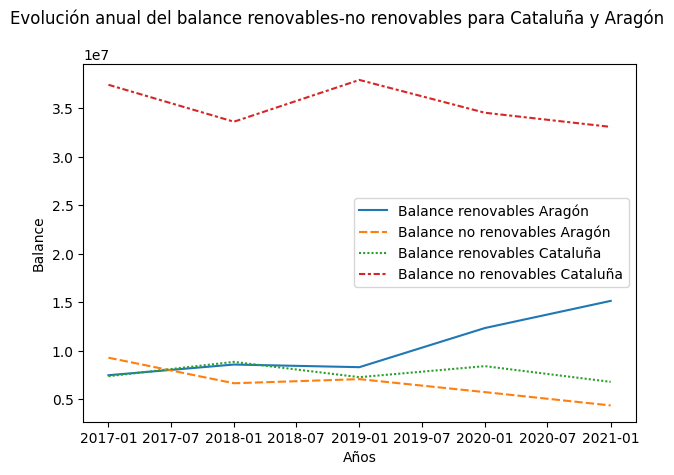

In [18]:
sns.lineplot(df_renov)
plt.ylabel(ylabel="Balance")
plt.xlabel(xlabel="Años")
plt.suptitle('Evolución anual del balance renovables-no renovables para Cataluña y Aragón')
plt.tight_layout()
plt.show()


3. Obtener la evolución mensual del balance de renovables y no renovables para Aragón y Cataluña de 2017 a 2021 (ambos incluidos). ¿Qué limitación de la API nos aparece si lo intentamos con un solo _GET_? 


{'errors': [{'code': 413,
   'status': '400',
   'title': 'Widget bad request',
   'detail': 'Petición fuera de rango. Límite a nivel mensual: 24.'}]}

4. Con más de un _GET_, obtener la evolución mensual del balance de renovables para Aragón y Cataluña de 2017 a 2021 (ambos incluidos). Mostrar el resultado tanto en formato DataFrame como en una gráfica que ilustre la evolución temporal. Devolver la fecha junto con el % de renovables en la que durante este periodo temporal la ratio tuvo mayor valor y menor valor en Aragón.

In [19]:
renov_dict = {'Años': [],
                'Balance renovables Aragón': [],
                'Balance no renovables Aragón': [],
                'Balance renovables Cataluña': [],
                'Balance no renovables Cataluña': []
                }

fechas = ['2017-01-01T00:00', '2018-01-01T00:00', '2019-01-01T00:00', '2020-01-01T00:00', '2021-01-01T00:00']


In [20]:
def send_to_dict(values_dict, location):
    for value in values_dict['included'][0]['attributes']['content'][-1]['attributes']['values'][:-1]:
        renov_dict[f'Balance renovables {location}'].append(value['value'])
    for value in values_dict['included'][1]['attributes']['content'][-1]['attributes']['values'][:-1]:
        renov_dict[f'Balance no renovables {location}'].append(value['value'])
        if location == 'Cataluña':
            renov_dict['Años'].append(value['datetime'])


In [21]:
for index, fecha in enumerate(fechas):
    if fechas[index] != fechas[-1]:
        respuesta_cat = requests.get(url_base + bypass_inputs(category='balance', widget='balance-electrico', fecha_inicio=fecha, fecha_fin=fechas[index+1], freq='month'))
        respuesta_aragon = requests.get(url_base + bypass_inputs(category='balance', widget='balance-electrico', fecha_inicio=fecha, fecha_fin=fechas[index+1], geo_ids='5', freq='month'))

        dict_cat = json.loads(json.dumps(respuesta_cat.json()))
        dict_aragon = json.loads(json.dumps(respuesta_aragon.json()))

        send_to_dict(dict_cat, 'Cataluña')
        send_to_dict(dict_aragon, 'Aragón')

df_renov_month = pd.DataFrame(renov_dict)


In [22]:
index_by_datetime(df_renov_month, name='Años')

df_renov_month


,Balance renovables Aragón,Balance no renovables Aragón,Balance renovables Cataluña,Balance no renovables Cataluña
Años,,,,
2017-01-01 00:00:00+01:00,768861.427,921110.419,6.108740e+05,3.382704e+06
2017-02-01 00:00:00+01:00,607413.308,653737.627,5.918090e+05,2.881415e+06
2017-03-01 00:00:00+01:00,702285.067,421052.112,7.259159e+05,3.195439e+06
2017-04-01 00:00:00+02:00,734906.612,471360.558,7.162563e+05,2.981533e+06
2017-05-01 00:00:00+02:00,625160.167,606232.044,8.435673e+05,2.677966e+06
2017-06-01 00:00:00+02:00,568177.748,749493.081,7.113685e+05,2.741026e+06
2017-07-01 00:00:00+02:00,666227.937,1250896.823,6.166746e+05,3.424520e+06
2017-08-01 00:00:00+02:00,579741.771,1077491.039,5.441139e+05,3.367369e+06
2017-09-01 00:00:00+02:00,461729.394,711771.424,4.860035e+05,3.172247e+06


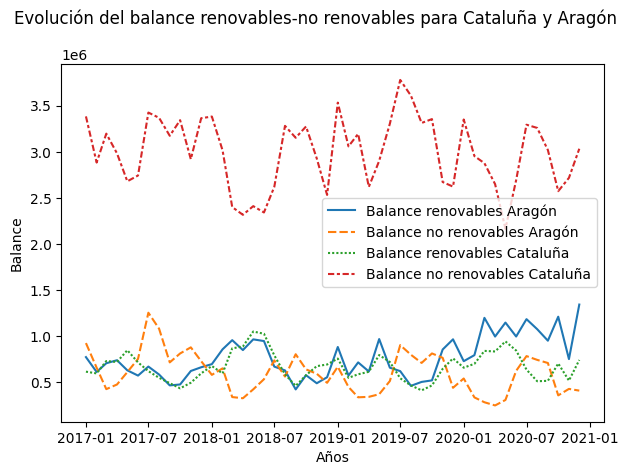

In [23]:
sns.lineplot(df_renov_month)
plt.ylabel(ylabel="Balance")
plt.xlabel(xlabel="Años")
plt.suptitle('Evolución del balance renovables-no renovables para Cataluña y Aragón')
plt.tight_layout()
plt.show()


In [24]:
df_renov_month = df_renov_month.reset_index()
df_renov_month['Años'] = df_renov_month['Años'].astype(str)


In [26]:
df_renov_month['Ratio renovables Aragón'] =  df_renov_month['Balance renovables Aragón'] / (df_renov_month['Balance renovables Aragón'] + df_renov_month['Balance no renovables Aragón'])

In [27]:
max_value = df_renov_month['Ratio renovables Aragón'].max()
max_date = list(df_renov_month[df_renov_month['Ratio renovables Aragón'] == max_value]['Años'])[0]

min_value = df_renov_month['Ratio renovables Aragón'].min()
min_date = list(df_renov_month[df_renov_month['Ratio renovables Aragón'] == min_value]['Años'])[0]

print('Durante el periodo analizado, la fecha con el mayor ratio de renovables en Aragón es ',max_date , ' con un valor de ', max_value * 100 , '%')
print('Durante el periodo analizado, la fecha con el menor ratio de renovables en Aragón es ',min_date , ' con un valor de ', min_value * 100 , '%')


Durante el periodo analizado, la fecha con el mayor ratio de renovables en Aragón es  2020-03-01 00:00:00+01:00  con un valor de  81.09554379299514 %
Durante el periodo analizado, la fecha con el menor ratio de renovables en Aragón es  2018-09-01 00:00:00+02:00  con un valor de  34.322876475068945 %


### 1.2. APIs QUE NECESITAN REGISTRO

Para trabajar esta parte vamos a empezar trabajando un ejemplo con una de las APIs que ofrece la NASA para obtener patentes relativas a diferentes campos de la ciencia. 

Para utilizar esta API, a diferencia del caso anterior, hace falta registrarse para obtener una clave (_API_KEY_) que va a necesitar ser incluida para realizar las diferentes solicitudes a la API.

Para registrarse (será necesario si queréis trabajar el ejemplo o reejecutarlo), es necesario que rellenéis el formulario que aparece en la parte 'Generate API Key' de la web: https://api.nasa.gov/ .
Cuando obtengáis el valor de la clave, tenedla localizable y copiadla en el notebook para definir la variable API_KEY. 

Una vez obtenida la clave y revisada la documentación de la API, podemos empezar a realizar peticiones para obtener datos. 

En el siguiente ejemplo, vamos a obtener las patentes relacionadas en la medicina que hay registradas. 

**NOTA:** Antes de ejecutar el código de nuevo, será necesario añadir el valor del _API\_KEY_ que has obtenido

In [ ]:
url_base='https://api.nasa.gov/techtransfer/'
API_KEY="cRzxxDn5YsuhQupa6KnK7xUwLeb1HscdyBRE7jcC"

# Opción 1
r1 = requests.get(url_base+"patent/", params = {"patent": "medicine","api_key":API_KEY})

#Opción 2
r2= requests.get('https://api.nasa.gov/techtransfer/patent/?engine&patent=medicine&api_key='+API_KEY)


r1 y r2 ofrecen la misma respuesta.

In [ ]:
# Imprimir los resultados obtenidos
print(json.dumps(r1.json(), indent=4))

{
    "results": [
        [
            "59fa144f9600025c4c39485a",
            "LAR-TOPS-248",
            "Non-invasive Intracranial Pressure Measurement",
            "An acknowledged objective of critical care medicine is a timely, accurate, readily deployable, cost-effective and, importantly, safe means of assessing and/or monitoring critical aspects/parameters of patient condition such as intracranial pressure.  However, ICP monitoring is complicated by a large set of variables related to the patients themselves -- presented symptoms, circumstances, and related information indicating such measurement; and relevant accompanying issues. These conditions and the various combinations thereof present attending physicians with the choice of many alternatives regarding key parameters, including but not limited to urgency, availability, appropriability, and accuracy to a minimum standard.  Cost, complexity, ease of use and other issues are also meaningful factors, but the bottom line fo